Heart disease prediction
Defining the problem
The goal is to predict the likelihood of having heart disease using demographic information such as age and gender, as well as medical history, lifestyle factors, and symptoms associated with heart disease.
Target Var is 1 (having a heart disease) or 0 (Not having a heart disease)
A Binary Classification using Deep Learning

Workflow
1- Problem Definition

2- Data Preprocessing

3- EDA

4- Model Architecture and Training

5- Feature Engineering and Selection

6- Hyperparameter Tuning

7- Model Evaluation

8- Model Deployment (Optional, not covered in this notebook)

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')


In [18]:
# Importing data
df=pd.read_csv('C:/Users/zohreh/Downloads/Compressed/archive_34/heart_disease_dataset.csv')
df.head()


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [19]:
print('length of data:',len(df))
print('-----------------')
print('df info', df.info())

length of data: 1000
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Ch

In [20]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [21]:
# Check for null values
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [22]:
# See rows where alcohol intake is null value
df[df['Alcohol Intake'].isnull()]

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,Male,309,110,73,Never,NaN,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
15,44,Female,250,111,66,Former,NaN,6,Yes,No,Yes,3,121,Yes,Non-anginal Pain,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,54,Male,304,112,86,Former,NaN,8,Yes,No,Yes,6,111,No,Asymptomatic,1
993,70,Female,346,110,62,Never,NaN,1,Yes,Yes,No,8,130,Yes,Asymptomatic,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


In [24]:
df['Alcohol Intake'].fillna('unknown',inplace=True)

In [25]:
df['Alcohol Intake'].value_counts()


Alcohol Intake
Heavy       346
unknown     340
Moderate    314
Name: count, dtype: int64

In [26]:
df_unchanged = df.copy() # Saving a copy for later


EDA

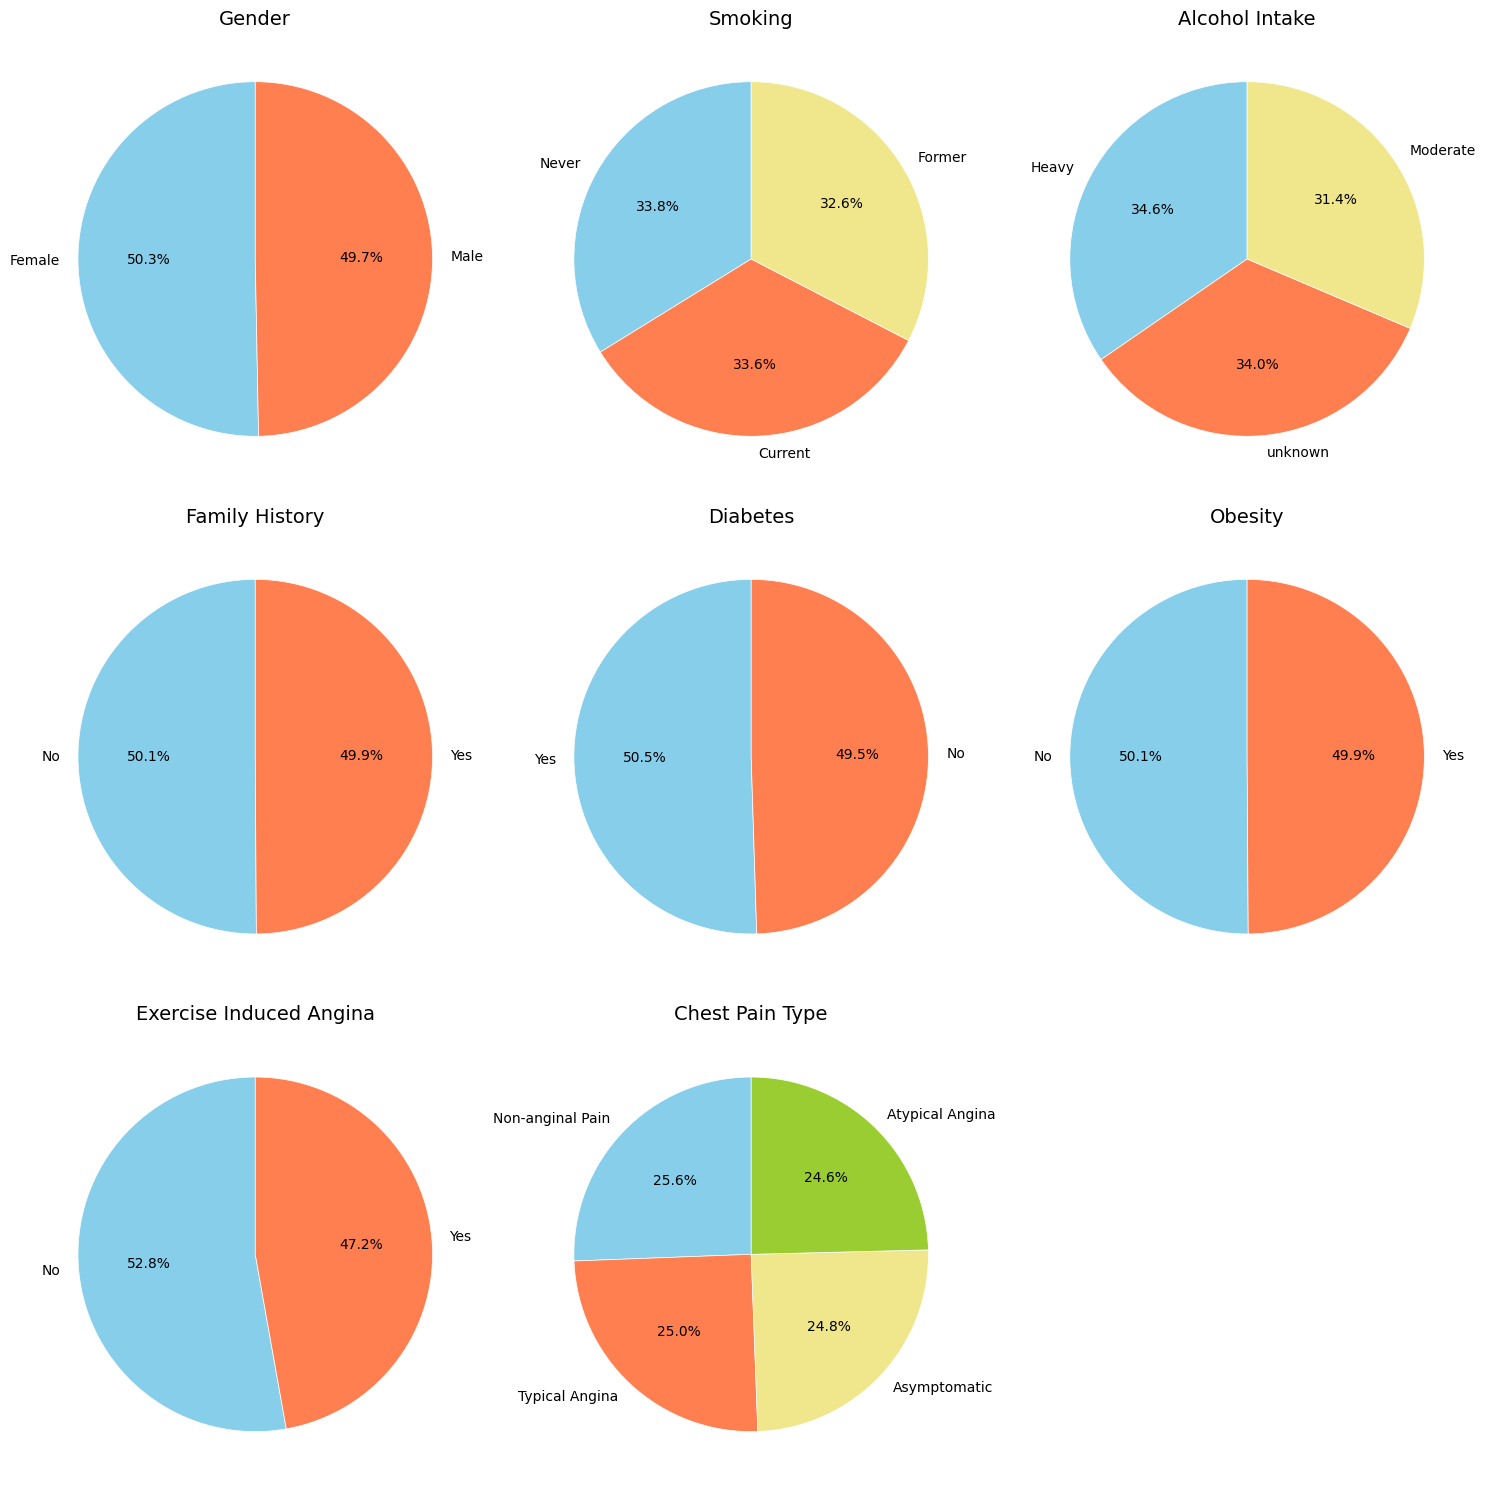

In [39]:
# Create pie charts for categorical columns
# Set the style for the plots
plt.style.use('ggplot')

# Get categorical columns
categorical_cols=df.select_dtypes(include=['object']).columns

# Create a figure with subplots
fig , axes= plt.subplots(3,3 ,figsize=(15,15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through categorical columns and create pie charts
for i , col in enumerate(categorical_cols):
    values=df[col].value_counts()
    labels=values.index.to_list()
    colors = plt.cm.tab10(np.arange(len(values)) % 10)
    axes[i].pie(values, labels=labels, colors=['skyblue','coral','khaki','yellowgreen'], autopct="%1.1f%%", startangle=90, wedgeprops={'edgecolor': 'white'})
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

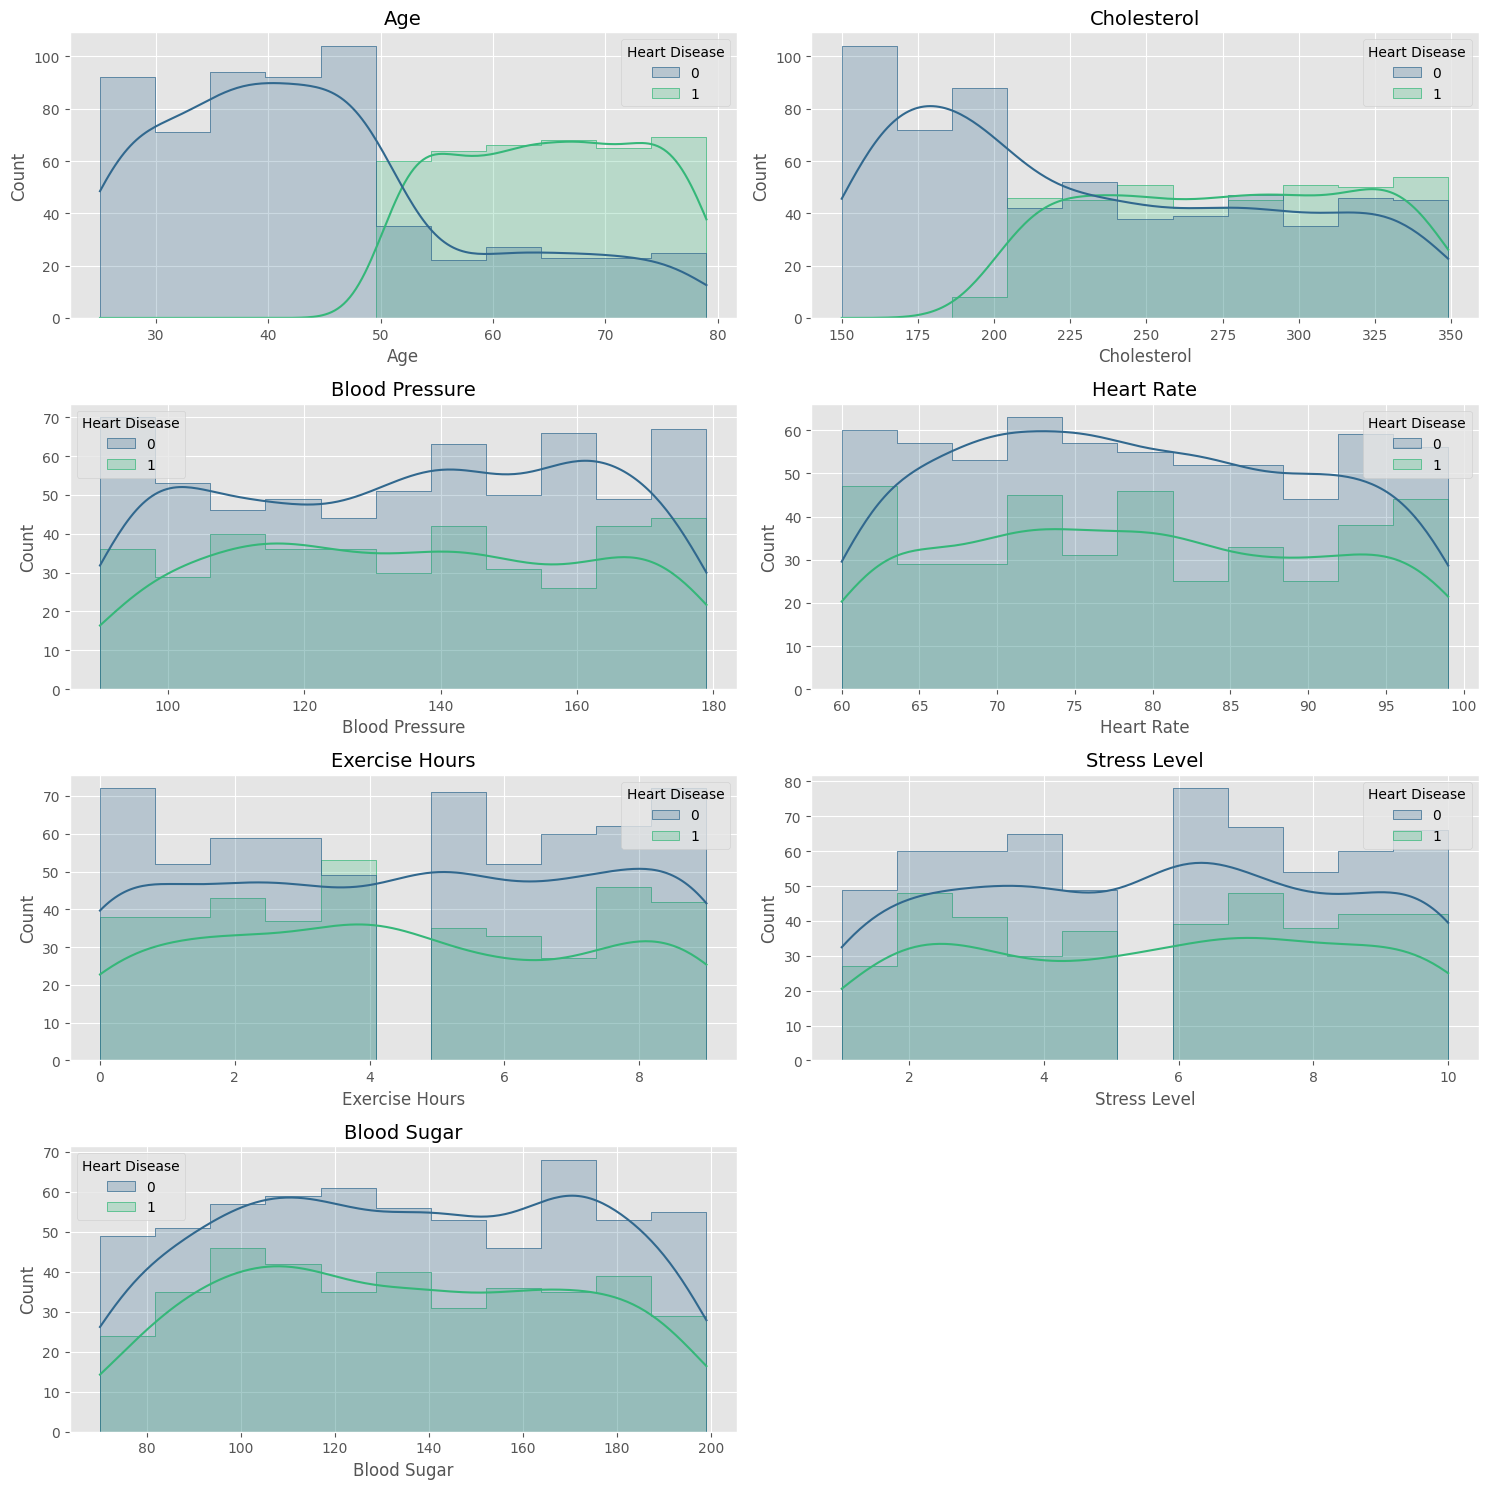

In [34]:
# Plot histograms for continuous variables
import seaborn as sns

# Get continuous columns
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns
continuous_cols = continuous_cols.drop('Heart Disease')

# Determine the number of plots
num_plots = len(continuous_cols)

# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through continuous columns and create histograms
for i, col in enumerate(continuous_cols):
    sns.histplot(data=df, x=col, kde=True, hue='Heart Disease', palette='viridis', element='step', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=14)

# Remove any empty subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

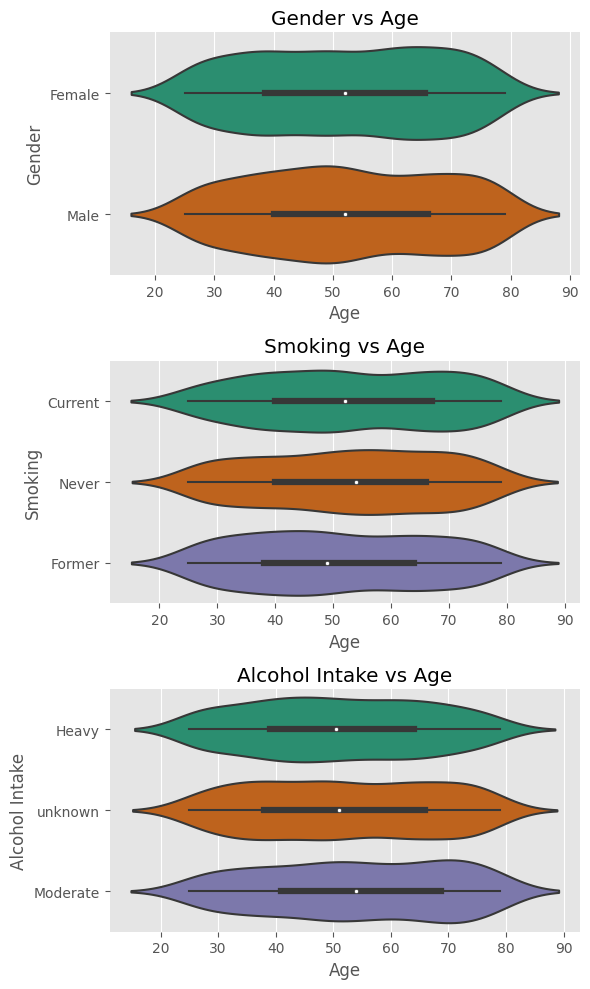

In [35]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Gender vs Age
sns.violinplot(data=df, x='Age', y='Gender', inner='box', palette='Dark2', ax=axes[0])
axes[0].set_title('Gender vs Age')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[0])

# Smoking vs Age
sns.violinplot(data=df, x='Age', y='Smoking', inner='box', palette='Dark2', ax=axes[1])
axes[1].set_title('Smoking vs Age')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[1])

# Alcohol Intake vs Age
sns.violinplot(data=df, x='Age', y='Alcohol Intake', inner='box', palette='Dark2', ax=axes[2])
axes[2].set_title('Alcohol Intake vs Age')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[2])

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

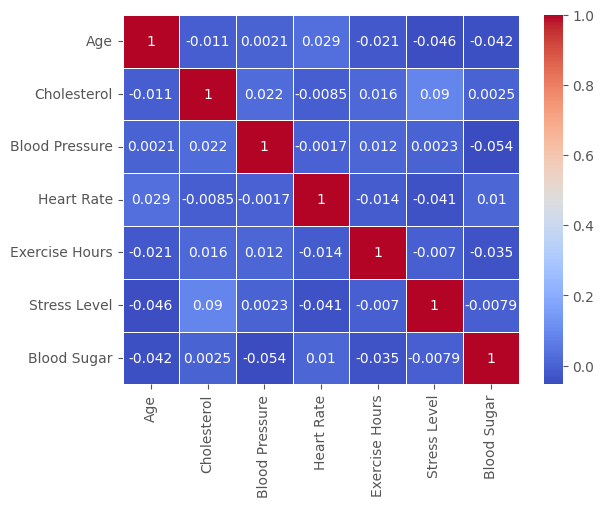

In [36]:
# Plot a correlation heatmap for numerical values

# Calculate the correlation matrix
correlation_matrix = df[continuous_cols].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm')

# Show the plot
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

# Define label encoder function
def label_encoder(df,categorical_cols):
  label_encoders = {}

  for col in categorical_cols:
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])
      label_encoders[col] = le
  return label_encoders

# Call function
label_encoder(df,categorical_cols)

{'Gender': LabelEncoder(),
 'Smoking': LabelEncoder(),
 'Alcohol Intake': LabelEncoder(),
 'Family History': LabelEncoder(),
 'Diabetes': LabelEncoder(),
 'Obesity': LabelEncoder(),
 'Exercise Induced Angina': LabelEncoder(),
 'Chest Pain Type': LabelEncoder()}

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1000 non-null   int64
 1   Gender                   1000 non-null   int32
 2   Cholesterol              1000 non-null   int64
 3   Blood Pressure           1000 non-null   int64
 4   Heart Rate               1000 non-null   int64
 5   Smoking                  1000 non-null   int32
 6   Alcohol Intake           1000 non-null   int32
 7   Exercise Hours           1000 non-null   int64
 8   Family History           1000 non-null   int32
 9   Diabetes                 1000 non-null   int32
 10  Obesity                  1000 non-null   int32
 11  Stress Level             1000 non-null   int64
 12  Blood Sugar              1000 non-null   int64
 13  Exercise Induced Angina  1000 non-null   int32
 14  Chest Pain Type          1000 non-null   int32
 15  Heart

In [42]:
# We will traet stress level and exercise hours as categorical since their values are limited within a specific range
continuous_cols = continuous_cols.drop(['Stress Level', 'Exercise Hours'])
continuous_cols

Index(['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Blood Sugar'], dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler

# Define scaler function
def standard_scaler(df, continuous_cols):
  # Initialize the scaler
  scaler = StandardScaler()
  df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
  return df

# Call function
standard_scaler(df, continuous_cols)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,1.444534,0,-0.379005,-0.617287,-1.150139,0,0,1,0,0,1,8,-0.434581,1,1,1
1,-0.273104,1,-0.793616,1.126782,-1.498561,0,2,5,0,0,0,9,-1.770413,1,3,0
2,0.044977,1,-0.275353,-1.678894,-1.063034,2,0,3,1,0,1,5,1.664583,1,1,1
3,1.062836,0,-1.000921,-1.716808,-0.627507,0,2,4,0,1,0,7,-0.761724,1,2,0
4,0.617523,0,-1.346429,1.050953,1.201706,2,2,6,0,1,0,2,1.310178,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.235825,0,0.329287,-0.920603,0.591968,2,0,5,0,1,1,10,-0.407320,0,2,1
996,1.635382,0,1.452189,0.368491,-0.279086,2,2,6,0,0,0,10,1.664583,1,3,1
997,1.698998,1,-1.709213,1.657586,0.156441,2,1,4,1,0,1,8,1.473749,1,0,0
998,0.490290,0,1.313986,0.595979,-0.975929,1,2,8,1,1,0,5,1.064821,1,1,1


Steps 4,5,6,7
Now that the data is ready we can start feeding it into our model. We will start by building a simple neural network using PyTorch. Note that it is not necessary to use neural nets for such problem with this amount of data; our goal is to practice using neural nets step by step and try our best to make the most out of it while avoiding overfitting

Epoch [1/100], Train Loss: 0.5151, Test Loss: 0.3569, Test Accuracy: 86.50%
Epoch [2/100], Train Loss: 0.3203, Test Loss: 0.2995, Test Accuracy: 86.00%
Epoch [3/100], Train Loss: 0.2689, Test Loss: 0.2212, Test Accuracy: 91.00%
Epoch [4/100], Train Loss: 0.1781, Test Loss: 0.1594, Test Accuracy: 91.00%
Epoch [5/100], Train Loss: 0.1401, Test Loss: 0.0975, Test Accuracy: 95.50%
Epoch [6/100], Train Loss: 0.1266, Test Loss: 0.1482, Test Accuracy: 94.50%
Epoch [7/100], Train Loss: 0.0946, Test Loss: 0.1049, Test Accuracy: 96.50%
Epoch [8/100], Train Loss: 0.0755, Test Loss: 0.0930, Test Accuracy: 95.50%
Epoch [9/100], Train Loss: 0.0614, Test Loss: 0.0888, Test Accuracy: 95.50%
Epoch [10/100], Train Loss: 0.0679, Test Loss: 0.0867, Test Accuracy: 96.00%
Epoch [11/100], Train Loss: 0.0536, Test Loss: 0.1106, Test Accuracy: 94.00%
Epoch [12/100], Train Loss: 0.2104, Test Loss: 0.1565, Test Accuracy: 94.00%
Epoch [13/100], Train Loss: 0.1027, Test Loss: 0.1150, Test Accuracy: 94.50%
Epoch [1

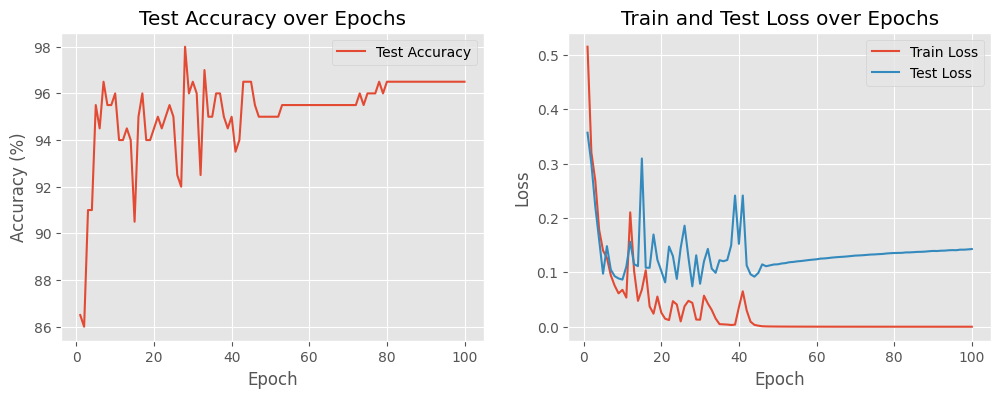

In [44]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
X = df.drop('Heart Disease', axis=1).values
y = df['Heart Disease'].values

# Define a function to split data
def split(df, X, y):

  # Convert to PyTorch tensors
  X = torch.tensor(X, dtype=torch.float32)
  y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  return X_train, X_test, y_train, y_test


# Define the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(15, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the network
net = Net()
num_epochs = 100

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Define data loaders function
def data_loaders(X_train, X_test, y_train, y_test):
  train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
  test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)
  return train_loader, test_loader

# Define training function
def train(net, train_loader, criterion, optimizer, num_epochs):

  train_losses = []
  test_losses = []
  test_accuracies = []

  for epoch in range(num_epochs):
      net.train()
      running_loss = 0.0
      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()

      train_losses.append(running_loss / len(train_loader))

      net.eval()
      test_loss = 0.0
      correct = 0
      total = 0
      with torch.no_grad():
          for inputs, labels in test_loader:
              outputs = net(inputs)
              loss = criterion(outputs, labels)
              test_loss += loss.item()
              predicted = (outputs >= 0.5).float()
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

      test_losses.append(test_loss / len(test_loader))
      accuracy = 100 * correct / total
      test_accuracies.append(accuracy)
      print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {accuracy:.2f}%')

  return train_losses, test_losses, test_accuracies

# Define a function to plot tran and test accuracies
def plot_train_test_loss(train_losses, test_losses):
  # Plot train and test accuracy
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy (%)')
  plt.legend()
  plt.title('Test Accuracy over Epochs')

  # Plot train and test loss
  plt.subplot(1, 2, 2)
  plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
  plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Train and Test Loss over Epochs')

  plt.show()


# Split the data
X_train, X_test, y_train, y_test = split(df, X, y)
# Load data
train_loader, test_loader = data_loaders(X_train, X_test, y_train, y_test)
# Train the model
train_losses, test_losses, test_accuracies = train(net, train_loader, criterion, optimizer, num_epochs)
# Plot train and test loss
plot_train_test_loss(train_losses, test_losses)

Epoch [1/100], Train Loss: 0.6549, Val Loss: 0.6589, Val Accuracy: 51.33%
Epoch [2/100], Train Loss: 0.4455, Val Loss: 0.5384, Val Accuracy: 76.00%
Epoch [3/100], Train Loss: 0.3474, Val Loss: 0.3208, Val Accuracy: 85.33%
Epoch [4/100], Train Loss: 0.2663, Val Loss: 0.3202, Val Accuracy: 82.67%
Epoch [5/100], Train Loss: 0.2084, Val Loss: 0.2281, Val Accuracy: 86.67%
Epoch [6/100], Train Loss: 0.1637, Val Loss: 0.1696, Val Accuracy: 90.67%
Epoch [7/100], Train Loss: 0.1690, Val Loss: 0.1964, Val Accuracy: 90.00%
Epoch [8/100], Train Loss: 0.1477, Val Loss: 0.1986, Val Accuracy: 89.33%
Epoch [9/100], Train Loss: 0.1096, Val Loss: 0.3895, Val Accuracy: 87.33%
Epoch [10/100], Train Loss: 0.1150, Val Loss: 0.1621, Val Accuracy: 92.67%
Epoch [11/100], Train Loss: 0.0957, Val Loss: 0.1644, Val Accuracy: 92.00%
Epoch [12/100], Train Loss: 0.0811, Val Loss: 0.1596, Val Accuracy: 93.33%
Epoch [13/100], Train Loss: 0.0818, Val Loss: 0.1341, Val Accuracy: 94.00%
Epoch [14/100], Train Loss: 0.0651

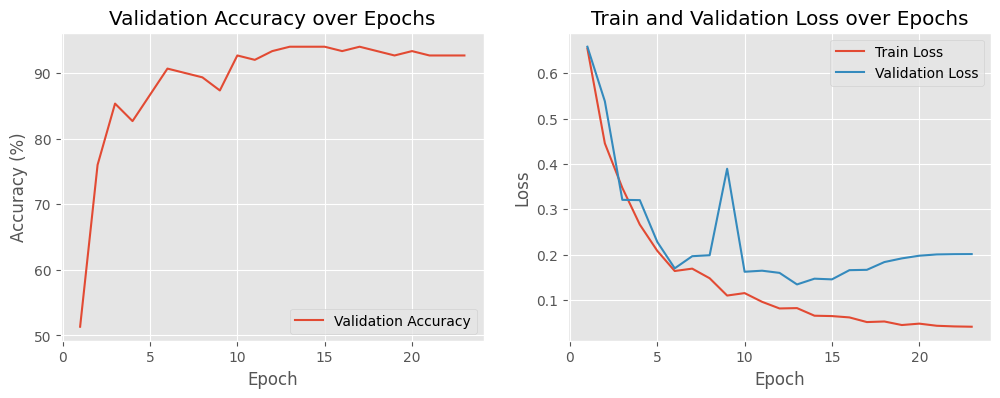

Test Loss: 0.0770, Test Accuracy: 98.00%


In [46]:
# Split the dataset into features and target
X = df.drop('Heart Disease', axis=1).values
y = df['Heart Disease'].values

# Define split the data into training, validation, and testing sets function
def split(df, X, y):

  # Convert to PyTorch tensors
  X = torch.tensor(X, dtype=torch.float32)
  y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

  # Split the data into training, validation, and testing sets
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

  return X_train, X_val, X_test, y_train, y_val, y_test

# Define the network with Dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(15, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the network
net = Net()
num_epochs = 100
patience = 10
best_loss = float('inf')
trigger_times = 0

# Define the loss function and optimizer with weight decay
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Define the data loaders function
def data_loaders(X_train, X_val, X_test, y_train, y_val, y_test):
  train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
  val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32, shuffle=False)
  test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

  return train_loader, val_loader, test_loader

# Define training and evaluation loop with early stopping fumction
def train(net, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience, best_loss, trigger_times):

  train_losses = []
  val_losses = []
  val_accuracies = []

  for epoch in range(num_epochs):
      net.train()
      running_loss = 0.0
      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()

      train_losses.append(running_loss / len(train_loader))

      net.eval()
      val_loss = 0.0
      correct = 0
      total = 0
      with torch.no_grad():
          for inputs, labels in val_loader:
              outputs = net(inputs)
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              predicted = (outputs >= 0.5).float()
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

      val_losses.append(val_loss / len(val_loader))
      accuracy = 100 * correct / total
      val_accuracies.append(accuracy)
      print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {accuracy:.2f}%')

      scheduler.step()

      # Early stopping
      if val_losses[-1] < best_loss:
          best_loss = val_losses[-1]
          trigger_times = 0
      else:
          trigger_times += 1

      if trigger_times >= patience:
          print('Early stopping!')
          break

  return train_losses, val_losses, val_accuracies, best_loss, trigger_times

# Define plot validation accuracy function
def plot_train_test_loss(train_losses, val_losses, val_accuracies):

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy (%)')
  plt.legend()
  plt.title('Validation Accuracy over Epochs')

  # Plot train and validation loss
  plt.subplot(1, 2, 2)
  plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
  plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Train and Validation Loss over Epochs')

  plt.show()

# Evaluate on the test set
def evaluate(net, test_loader, criterion):
  net.eval()
  test_loss = 0.0
  correct = 0
  total = 0
  with torch.no_grad():
      for inputs, labels in test_loader:
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          test_loss += loss.item()
          predicted = (outputs >= 0.5).float()
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  test_accuracy = 100 * correct / total
  print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split(df, X, y)
# Load the data
train_loader, val_loader, test_loader = data_loaders(X_train, X_val, X_test, y_train, y_val, y_test)
# Train the model
train_losses, val_losses, val_accuracies, best_loss, trigger_times = train(net, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience, best_loss, trigger_times)
# Plot train and validation loss
plot_train_test_loss(train_losses, val_losses, val_accuracies)
# Evaluate on the test set
evaluate(net, test_loader, criterion)

Much better now!
The use of regularization and validation set has provided valuable insights into the model's performance and has helped to tune the model effectively. The high validation and test accuracies, along with low losses, suggest that the neural network model is well-suited to this problem and has been trained effectively.

Now let's check for feature importance. We want to see which features of the dataset are contributing more to model's learning.

Feature: Age, Importance: 0.3624
Feature: Gender, Importance: -0.0024
Feature: Cholesterol, Importance: 0.1612
Feature: Blood Pressure, Importance: 0.0035
Feature: Heart Rate, Importance: 0.0059
Feature: Smoking, Importance: 0.0094
Feature: Alcohol Intake, Importance: -0.0012
Feature: Exercise Hours, Importance: 0.0035
Feature: Family History, Importance: 0.0035
Feature: Diabetes, Importance: 0.0024
Feature: Obesity, Importance: 0.0000
Feature: Stress Level, Importance: 0.0000
Feature: Blood Sugar, Importance: 0.0071
Feature: Exercise Induced Angina, Importance: -0.0012
Feature: Chest Pain Type, Importance: 0.0035


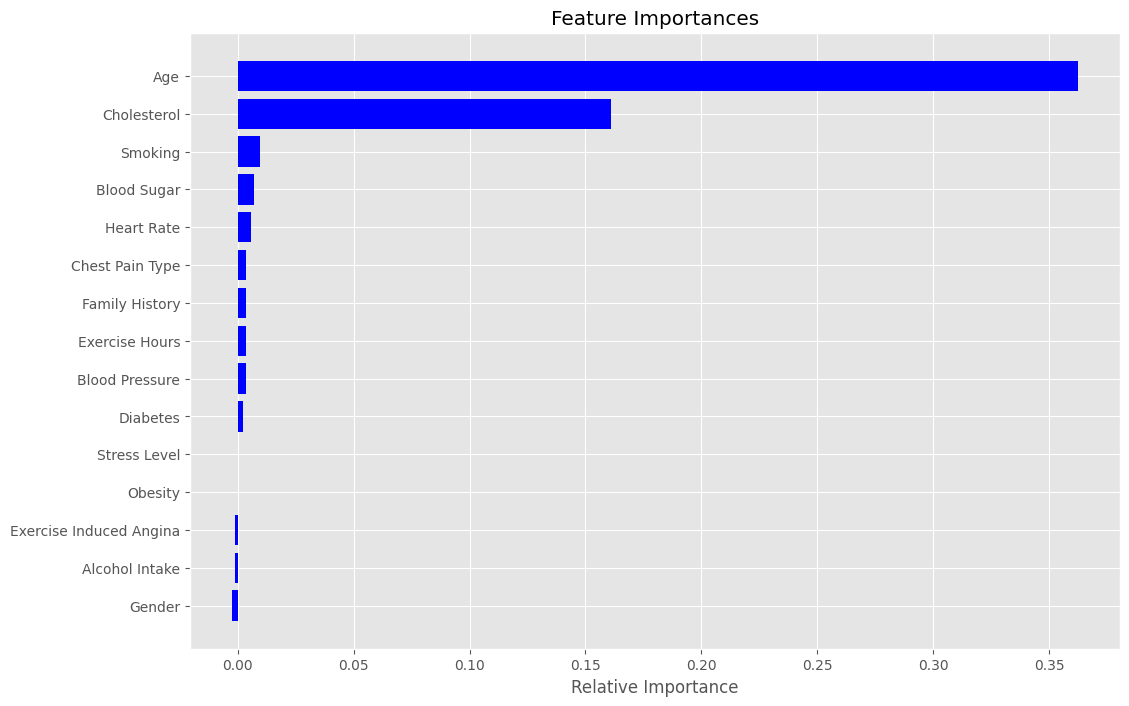

In [47]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

def check_feature_importance(model, X_train, y_train, X_test, y_test, feature_names):
    def compute_permutation_importance(model, X, y):
        model.eval()
        y_pred = (model(X) >= 0.5).float()
        baseline_accuracy = accuracy_score(y, y_pred)

        feature_importances = []
        for i in range(X.shape[1]):
            X_permuted = X.clone()
            X_permuted[:, i] = X_permuted[torch.randperm(X.shape[0]), i]
            y_pred_permuted = (model(X_permuted) >= 0.5).float()
            permuted_accuracy = accuracy_score(y, y_pred_permuted)
            importance = baseline_accuracy - permuted_accuracy
            feature_importances.append(importance)

        return np.array(feature_importances)

    # Combine training and validation sets to compute feature importance
    X_combined = torch.cat((X_train, X_test))
    y_combined = torch.cat((y_train, y_test))

    # Compute permutation importance
    importances = compute_permutation_importance(model, X_combined, y_combined)

    # Print feature importances
    for i, col in enumerate(feature_names):
        print(f"Feature: {col}, Importance: {importances[i]:.4f}")

    # Plot feature importances
    indices = np.argsort(importances)
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

feature_names = df.drop('Heart Disease', axis=1).columns

# Check feature importance
check_feature_importance(net, X_train, y_train, X_test, y_test, feature_names)

We can see that the model is heavily realying on Age and Cholesterol!
Let's now drop these features and train the model without them.

Epoch [1/100], Train Loss: 0.6678, Val Loss: 0.7250, Val Accuracy: 51.33%
Epoch [2/100], Train Loss: 0.6708, Val Loss: 0.7219, Val Accuracy: 51.33%
Epoch [3/100], Train Loss: 0.6649, Val Loss: 0.7153, Val Accuracy: 51.33%
Epoch [4/100], Train Loss: 0.6621, Val Loss: 0.7135, Val Accuracy: 51.33%
Epoch [5/100], Train Loss: 0.6618, Val Loss: 0.7188, Val Accuracy: 51.33%
Epoch [6/100], Train Loss: 0.6596, Val Loss: 0.7179, Val Accuracy: 51.33%
Epoch [7/100], Train Loss: 0.6523, Val Loss: 0.7432, Val Accuracy: 51.33%
Epoch [8/100], Train Loss: 0.6491, Val Loss: 0.7947, Val Accuracy: 51.33%
Epoch [9/100], Train Loss: 0.6422, Val Loss: 0.7860, Val Accuracy: 51.33%
Epoch [10/100], Train Loss: 0.6422, Val Loss: 0.7633, Val Accuracy: 51.33%
Epoch [11/100], Train Loss: 0.6352, Val Loss: 0.7722, Val Accuracy: 51.33%
Epoch [12/100], Train Loss: 0.6272, Val Loss: 0.8071, Val Accuracy: 51.33%
Epoch [13/100], Train Loss: 0.6271, Val Loss: 0.8311, Val Accuracy: 51.33%
Epoch [14/100], Train Loss: 0.6280

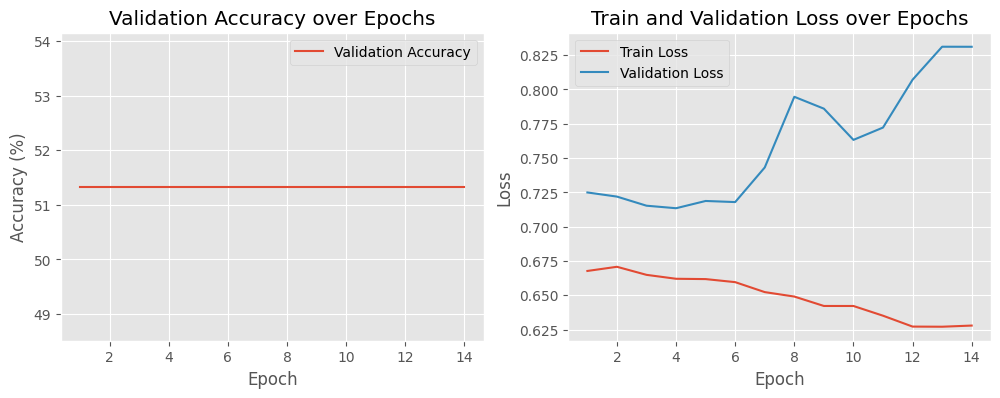

Test Loss: 0.8136, Test Accuracy: 62.67%


In [48]:
# Split the dataset into features and target
X = df.drop(['Heart Disease', 'Age', 'Cholesterol'] , axis=1).values # Dropping Age and Cholesterol
y = df['Heart Disease'].values

# Define the network with Dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 64) # Update input from 15 to 13
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the network
net = Net()
num_epochs = 100
patience = 10
best_loss = float('inf')
trigger_times = 0

# Define the loss function and optimizer with weight decay
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split(df, X, y)
# Load the data
train_loader, val_loader, test_loader = data_loaders(X_train, X_val, X_test, y_train, y_val, y_test)
# Train the model
train_losses, val_losses, val_accuracies, best_loss, trigger_times = train(net, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience, best_loss, trigger_times)
# Plot train and validation loss
plot_train_test_loss(train_losses, val_losses, val_accuracies)
# Evaluate on the test set
evaluate(net, test_loader, criterion)

The model is not learning at all! Now we will try training with only Age and Cholesterol.



Epoch [1/100], Train Loss: 0.3485, Val Loss: 0.1233, Val Accuracy: 94.67%
Epoch [2/100], Train Loss: 0.1223, Val Loss: 0.0527, Val Accuracy: 98.00%
Epoch [3/100], Train Loss: 0.0628, Val Loss: 0.0427, Val Accuracy: 98.67%
Epoch [4/100], Train Loss: 0.0591, Val Loss: 0.0845, Val Accuracy: 96.00%
Epoch [5/100], Train Loss: 0.0365, Val Loss: 0.0193, Val Accuracy: 98.67%
Epoch [6/100], Train Loss: 0.0580, Val Loss: 0.0228, Val Accuracy: 100.00%
Epoch [7/100], Train Loss: 0.0225, Val Loss: 0.0206, Val Accuracy: 99.33%
Epoch [8/100], Train Loss: 0.0219, Val Loss: 0.0355, Val Accuracy: 98.00%
Epoch [9/100], Train Loss: 0.0371, Val Loss: 0.0277, Val Accuracy: 98.67%
Epoch [10/100], Train Loss: 0.0352, Val Loss: 0.2359, Val Accuracy: 93.33%
Epoch [11/100], Train Loss: 0.0764, Val Loss: 0.1067, Val Accuracy: 96.00%
Epoch [12/100], Train Loss: 0.0387, Val Loss: 0.0306, Val Accuracy: 98.67%
Epoch [13/100], Train Loss: 0.0230, Val Loss: 0.0194, Val Accuracy: 99.33%
Epoch [14/100], Train Loss: 0.029

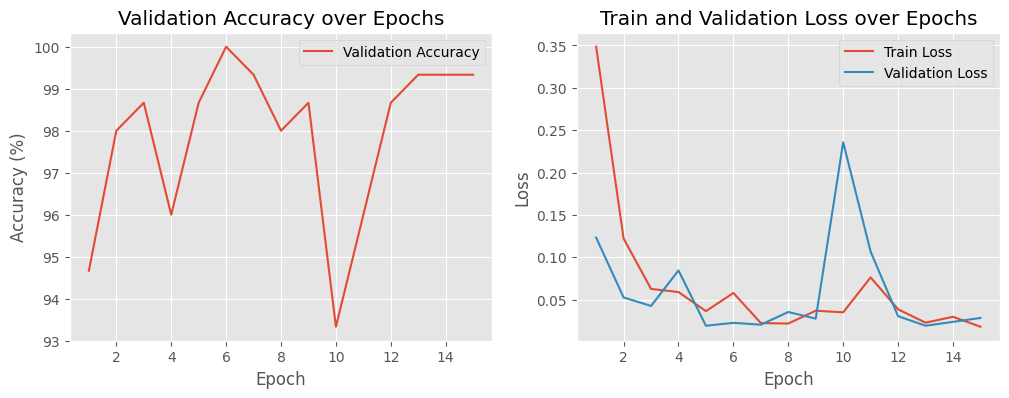

Test Loss: 0.0106, Test Accuracy: 100.00%


In [49]:
# Split the dataset into features and target
X = df[['Age', 'Cholesterol']].values # Only using Age and Cholesterol as new features
y = df['Heart Disease'].values

# Define the network with Dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 64) # Update input size from 15 to 2
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the network
net = Net()
num_epochs = 100
patience = 10
best_loss = float('inf')
trigger_times = 0

# Define the loss function and optimizer with weight decay
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split(df, X, y)
# Load the data
train_loader, val_loader, test_loader = data_loaders(X_train, X_val, X_test, y_train, y_val, y_test)
# Train the model
train_losses, val_losses, val_accuracies, best_loss, trigger_times = train(net, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience, best_loss, trigger_times)
# Plot train and validation loss
plot_train_test_loss(train_losses, val_losses, val_accuracies)
# Evaluate on the test set
evaluate(net, test_loader, criterion)

Sign of overfitting!
We need more regularization so let's add more dropout and use batch normalization

Epoch [1/100], Train Loss: 0.6908, Val Loss: 0.6727, Val Accuracy: 54.00%
Epoch [2/100], Train Loss: 0.6348, Val Loss: 0.6026, Val Accuracy: 76.67%
Epoch [3/100], Train Loss: 0.5837, Val Loss: 0.5721, Val Accuracy: 80.00%
Epoch [4/100], Train Loss: 0.5715, Val Loss: 0.5545, Val Accuracy: 78.67%
Epoch [5/100], Train Loss: 0.5437, Val Loss: 0.5179, Val Accuracy: 85.33%
Epoch [6/100], Train Loss: 0.5182, Val Loss: 0.4979, Val Accuracy: 84.00%
Epoch [7/100], Train Loss: 0.4933, Val Loss: 0.4763, Val Accuracy: 87.33%
Epoch [8/100], Train Loss: 0.4697, Val Loss: 0.4481, Val Accuracy: 88.67%
Epoch [9/100], Train Loss: 0.4605, Val Loss: 0.4042, Val Accuracy: 89.33%
Epoch [10/100], Train Loss: 0.4427, Val Loss: 0.4067, Val Accuracy: 88.67%
Epoch [11/100], Train Loss: 0.4511, Val Loss: 0.3869, Val Accuracy: 88.67%
Epoch [12/100], Train Loss: 0.4432, Val Loss: 0.3834, Val Accuracy: 90.00%
Epoch [13/100], Train Loss: 0.4240, Val Loss: 0.3875, Val Accuracy: 89.33%
Epoch [14/100], Train Loss: 0.4251

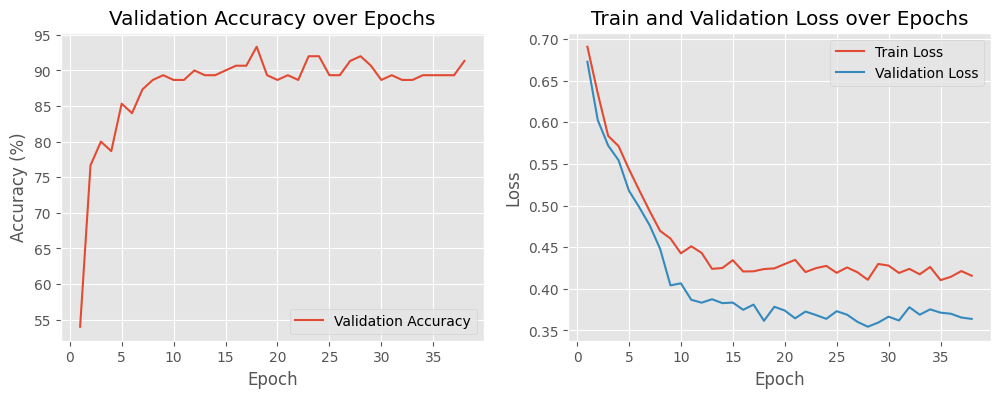

Test Loss: 0.3297, Test Accuracy: 98.00%


In [50]:
# Split the dataset into features and target
X = df[['Age', 'Cholesterol']].values  # Only using Age and Cholesterol as new features
y = df['Heart Disease'].values

# Define the network with Batch Normalization and Dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 32)  # Reduce input size to 2
        self.bn1 = nn.BatchNorm1d(32)
        self.fc2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.fc3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.fc4 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.6)  # Increase dropout rate

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(torch.relu(self.bn2(self.fc2(x))))
        x = self.dropout(torch.relu(self.bn3(self.fc3(x))))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the network
net = Net()

# Define the loss function and optimizer with weight decay
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-3)  # Increase weight decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

num_epochs = 100
patience = 10
best_loss = float('inf')
trigger_times = 0
min_delta = 0.001  # Minimum change to qualify as an improvement

def train(net, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience, best_loss, trigger_times, min_delta):
  train_losses = []
  val_losses = []
  val_accuracies = []

  for epoch in range(num_epochs):
      net.train()
      running_loss = 0.0
      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()

      train_losses.append(running_loss / len(train_loader))

      net.eval()
      val_loss = 0.0
      correct = 0
      total = 0
      with torch.no_grad():
          for inputs, labels in val_loader:
              outputs = net(inputs)
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              predicted = (outputs >= 0.5).float()
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

      val_losses.append(val_loss / len(val_loader))
      accuracy = 100 * correct / total
      val_accuracies.append(accuracy)
      print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {accuracy:.2f}%')

      scheduler.step()

      # Early stopping
      if val_losses[-1] < best_loss - min_delta:
          best_loss = val_losses[-1]
          trigger_times = 0
      else:
          trigger_times += 1

      if trigger_times >= patience:
          print('Early stopping!')
          break
  return train_losses, val_losses, val_accuracies, best_loss, trigger_times

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split(df, X, y)
# Load the data
train_loader, val_loader, test_loader = data_loaders(X_train, X_val, X_test, y_train, y_val, y_test)
# Train the model
train_losses, val_losses, val_accuracies, best_loss, trigger_times = train(net, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience, best_loss, trigger_times, min_delta)
# Plot train and validation loss
plot_train_test_loss(train_losses, val_losses, val_accuracies)
# Evaluate on the test set
evaluate(net, test_loader, criterion)

More promising now. But it's not really practical if we only use age and cholesterol to predict heart disease that's a no brainer! So we conclude that these two features are necessary for model to learn, but traning with only using these two can lead to overfitting. We know that we need a good combination of all features to train a decent model. Let's bin these two feature into multiple ranges and use them as categorical variables.

In [51]:
# Binning age and cholesterol levels

df_unchanged['Age_binned'] = pd.cut(df_unchanged['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100'])
df_unchanged['Cholesterol_binned'] = pd.cut(df_unchanged['Cholesterol'], bins=[0, 200, 240, 300, 400], labels=['Normal', 'Borderline', 'High', 'Very High'])

print(df_unchanged['Age_binned'].value_counts())
print(df_unchanged['Cholesterol_binned'].value_counts())

Age_binned
40-50     195
60-70     192
50-60     177
30-40     171
70-80     161
20-30     104
0-20        0
80-100      0
Name: count, dtype: int64
Cholesterol_binned
High          301
Normal        253
Very High     242
Borderline    204
Name: count, dtype: int64


In [52]:
df_unchanged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1000 non-null   int64   
 1   Gender                   1000 non-null   object  
 2   Cholesterol              1000 non-null   int64   
 3   Blood Pressure           1000 non-null   int64   
 4   Heart Rate               1000 non-null   int64   
 5   Smoking                  1000 non-null   object  
 6   Alcohol Intake           1000 non-null   object  
 7   Exercise Hours           1000 non-null   int64   
 8   Family History           1000 non-null   object  
 9   Diabetes                 1000 non-null   object  
 10  Obesity                  1000 non-null   object  
 11  Stress Level             1000 non-null   int64   
 12  Blood Sugar              1000 non-null   int64   
 13  Exercise Induced Angina  1000 non-null   object  
 14  Chest Pai

In [53]:
# Redefining categorical and numerical columns

categorical_cols = df_unchanged.select_dtypes(include=['object', 'category']).columns
continuous_cols = df_unchanged.select_dtypes(include=['int64', 'float64']).columns
continuous_cols = continuous_cols.drop(['Heart Disease', 'Age', 'Cholesterol','Stress Level', 'Exercise Hours'])


print('Categorical columns', categorical_cols)
print('Continuous columns', continuous_cols)

Categorical columns Index(['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes',
       'Obesity', 'Exercise Induced Angina', 'Chest Pain Type', 'Age_binned',
       'Cholesterol_binned'],
      dtype='object')
Continuous columns Index(['Blood Pressure', 'Heart Rate', 'Blood Sugar'], dtype='object')


In [54]:
# Label encoding and Scaling

label_encoder(df_unchanged, categorical_cols)
standard_scaler(df_unchanged, continuous_cols)

df_unchanged.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,Age_binned,Cholesterol_binned
0,75,0,228,-0.617287,-1.150139,0,0,1,0,0,1,8,-0.434581,1,1,1,5,0
1,48,1,204,1.126782,-1.498561,0,2,5,0,0,0,9,-1.770413,1,3,0,2,0
2,53,1,234,-1.678894,-1.063034,2,0,3,1,0,1,5,1.664583,1,1,1,3,0
3,69,0,192,-1.716808,-0.627507,0,2,4,0,1,0,7,-0.761724,1,2,0,4,2
4,62,0,172,1.050953,1.201706,2,2,6,0,1,0,2,1.310178,1,0,0,4,2


Epoch [1/100], Train Loss: 0.6917, Val Loss: 0.6926, Val Accuracy: 51.33%
Epoch [2/100], Train Loss: 0.6549, Val Loss: 0.6688, Val Accuracy: 51.33%
Epoch [3/100], Train Loss: 0.6145, Val Loss: 0.6091, Val Accuracy: 51.33%
Epoch [4/100], Train Loss: 0.5872, Val Loss: 0.5523, Val Accuracy: 51.33%
Epoch [5/100], Train Loss: 0.5528, Val Loss: 0.5171, Val Accuracy: 70.67%
Epoch [6/100], Train Loss: 0.5123, Val Loss: 0.4576, Val Accuracy: 81.33%
Epoch [7/100], Train Loss: 0.4649, Val Loss: 0.3970, Val Accuracy: 84.67%
Epoch [8/100], Train Loss: 0.4547, Val Loss: 0.3953, Val Accuracy: 82.00%
Epoch [9/100], Train Loss: 0.4518, Val Loss: 0.3806, Val Accuracy: 87.33%
Epoch [10/100], Train Loss: 0.4358, Val Loss: 0.3690, Val Accuracy: 86.67%
Epoch [11/100], Train Loss: 0.4571, Val Loss: 0.3562, Val Accuracy: 87.33%
Epoch [12/100], Train Loss: 0.4385, Val Loss: 0.3625, Val Accuracy: 88.67%
Epoch [13/100], Train Loss: 0.4634, Val Loss: 0.3636, Val Accuracy: 88.67%
Epoch [14/100], Train Loss: 0.4389

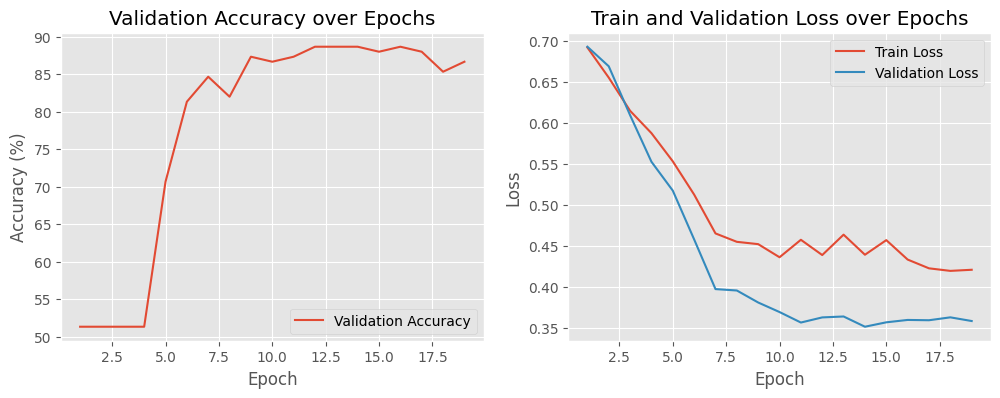

Test Loss: 0.3565, Test Accuracy: 82.67%


In [55]:
# Split the dataset into features and target
X = df_unchanged.drop(['Heart Disease', 'Age', 'Cholesterol'], axis=1).values
y = df_unchanged['Heart Disease'].values


# Define the network with Batch Normalization and Dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(15, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.fc2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.fc3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.fc4 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.7)  # Increase dropout rate

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(torch.relu(self.bn2(self.fc2(x))))
        x = self.dropout(torch.relu(self.bn3(self.fc3(x))))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the network
net = Net()

# Define the loss function and optimizer with weight decay
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=1e-4)  # Increase weight decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

num_epochs = 100
patience = 5
best_loss = float('inf')
trigger_times = 0
min_delta = 0.001  # Minimum change to qualify as an improvement


# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split(df_unchanged, X, y)
# Load the data
train_loader, val_loader, test_loader = data_loaders(X_train, X_val, X_test, y_train, y_val, y_test)
# Train the model
train_losses, val_losses, val_accuracies, best_loss, trigger_times = train(net, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience, best_loss, trigger_times, min_delta)
# Plot train and validation loss
plot_train_test_loss(train_losses, val_losses, val_accuracies)
# Evaluate on the test set
evaluate(net, test_loader, criterion)

Feature: Gender, Importance: 0.0012
Feature: Blood Pressure, Importance: 0.0012
Feature: Heart Rate, Importance: -0.0012
Feature: Smoking, Importance: 0.0000
Feature: Alcohol Intake, Importance: 0.0024
Feature: Exercise Hours, Importance: 0.0047
Feature: Family History, Importance: -0.0024
Feature: Diabetes, Importance: 0.0012
Feature: Obesity, Importance: 0.0012
Feature: Stress Level, Importance: 0.0047
Feature: Blood Sugar, Importance: 0.0012
Feature: Exercise Induced Angina, Importance: -0.0012
Feature: Chest Pain Type, Importance: 0.0000
Feature: Age_binned, Importance: 0.3435
Feature: Cholesterol_binned, Importance: 0.0094


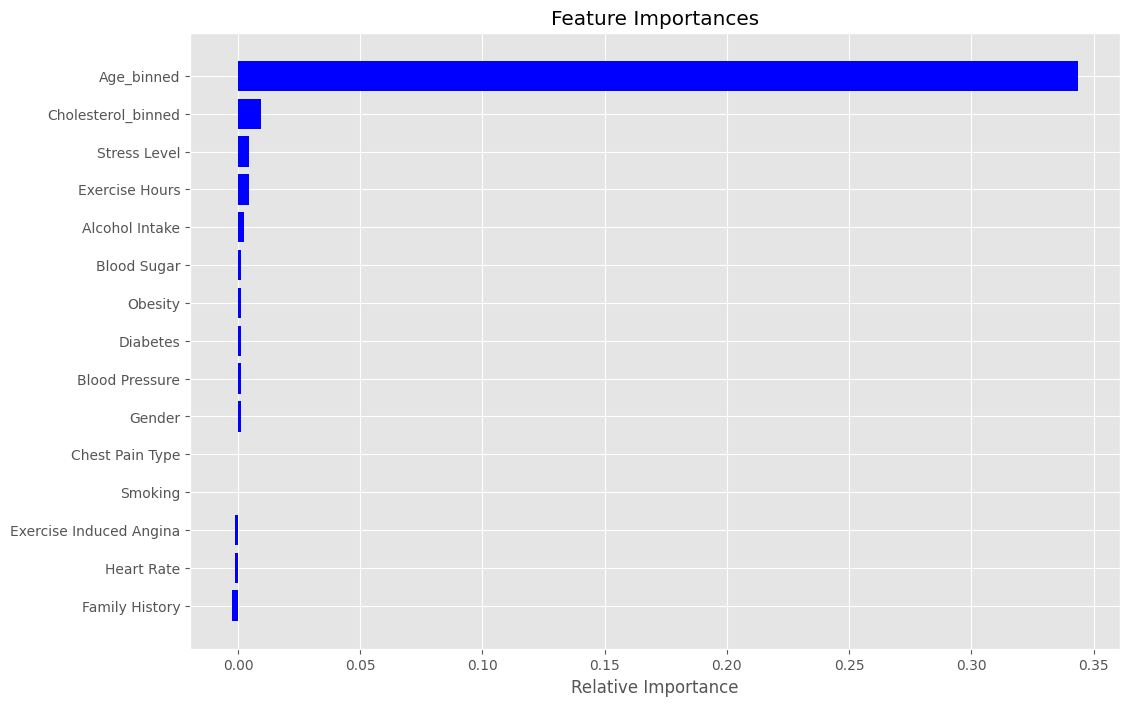

In [56]:
# Check feature importance

feature_names = df_unchanged.drop(['Heart Disease', 'Age', 'Cholesterol'], axis=1).columns
check_feature_importance(net, X_train, y_train, X_test, y_test, feature_names)

We can see good results in training but the model is still relying on Ages even when we binned them into different classes. Let's try minimizing the impact of Age on model's learning performance by adding a penalty to the loss function specifically aimed at the weights associated with the Age_binned in FC1.

In [57]:
# Check to see the order of features in our input(X)
X = df_unchanged.drop(['Heart Disease', 'Age', 'Cholesterol'], axis=1)
X.columns

Index(['Gender', 'Blood Pressure', 'Heart Rate', 'Smoking', 'Alcohol Intake',
       'Exercise Hours', 'Family History', 'Diabetes', 'Obesity',
       'Stress Level', 'Blood Sugar', 'Exercise Induced Angina',
       'Chest Pain Type', 'Age_binned', 'Cholesterol_binned'],
      dtype='object')

Epoch [1/100], Train Loss: 0.8733, Val Loss: 0.7076, Val Accuracy: 52.00%
Epoch [2/100], Train Loss: 0.6834, Val Loss: 0.7067, Val Accuracy: 51.33%
Epoch [3/100], Train Loss: 0.6631, Val Loss: 0.7137, Val Accuracy: 51.33%
Epoch [4/100], Train Loss: 0.6592, Val Loss: 0.7186, Val Accuracy: 51.33%
Epoch [5/100], Train Loss: 0.6456, Val Loss: 0.7114, Val Accuracy: 51.33%
Epoch [6/100], Train Loss: 0.6332, Val Loss: 0.6752, Val Accuracy: 51.33%
Epoch [7/100], Train Loss: 0.6022, Val Loss: 0.6583, Val Accuracy: 51.33%
Epoch [8/100], Train Loss: 0.5563, Val Loss: 0.5544, Val Accuracy: 51.33%
Epoch [9/100], Train Loss: 0.5150, Val Loss: 0.5255, Val Accuracy: 75.33%
Epoch [10/100], Train Loss: 0.4898, Val Loss: 0.5247, Val Accuracy: 78.67%
Epoch [11/100], Train Loss: 0.4687, Val Loss: 0.4765, Val Accuracy: 79.33%
Epoch [12/100], Train Loss: 0.4423, Val Loss: 0.4406, Val Accuracy: 79.33%
Epoch [13/100], Train Loss: 0.4295, Val Loss: 0.4217, Val Accuracy: 86.67%
Epoch [14/100], Train Loss: 0.4245

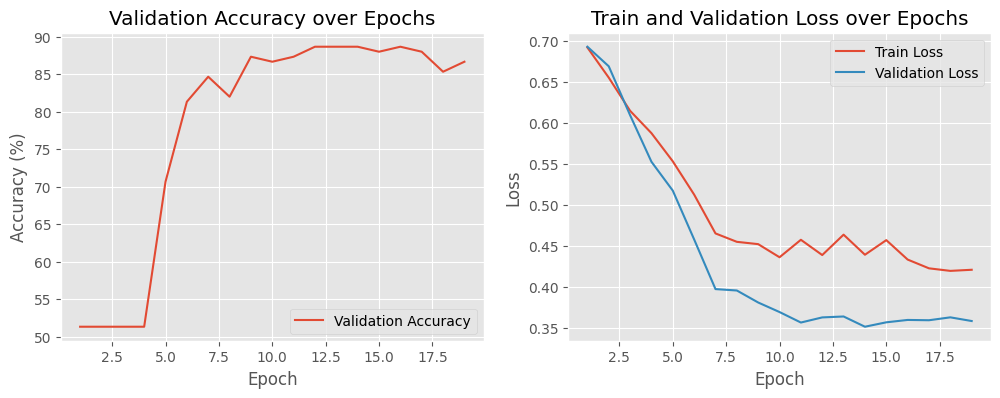

Test Loss: 0.3674, Test Accuracy: 82.00%


In [58]:
# Split the dataset into features and target
X = df_unchanged.drop(['Heart Disease', 'Age', 'Cholesterol'], axis=1).values
y = df_unchanged['Heart Disease'].values

# Define the network with Batch Normalization and Dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(15, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.fc2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.fc3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.fc4 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(torch.relu(self.bn2(self.fc2(x))))
        x = self.dropout(torch.relu(self.bn3(self.fc3(x))))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the network
net = Net()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Custom loss function with additional penalty on Age_binned weight
def custom_loss(output, target, model, penalty_weight):
    base_loss = criterion(output, target)
    age_binned_weight = model.fc1.weight[:, 13]  # Age_binned is the 13th feature
    penalty = penalty_weight * torch.sum(age_binned_weight**2)
    return base_loss + penalty


# Training loop
num_epochs = 100
patience = 5
best_loss = float('inf')
trigger_times = 0
min_delta = 0.001  # Minimum change to qualify as an improvement
penalty_weight = 0.96  # Adjust this weight as needed

def train(net, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience, best_loss, trigger_times, min_delta, penalty_weight):
  for epoch in range(num_epochs):
      net.train()
      train_loss = 0.0
      for i, (inputs, labels) in enumerate(train_loader):
          optimizer.zero_grad()
          outputs = net(inputs)
          loss = custom_loss(outputs, labels, net, penalty_weight)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()
      train_loss /= len(train_loader)

      # Validation step
      net.eval()
      val_loss = 0.0
      correct = 0
      total = 0
      with torch.no_grad():
          for inputs, labels in val_loader:
              outputs = net(inputs)
              loss = custom_loss(outputs, labels, net, penalty_weight)
              val_loss += loss.item()
              predicted = (outputs > 0.5).float()
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
      val_loss /= len(val_loader)
      val_accuracy = 100 * correct / total

      # Early stopping
      if val_loss < best_loss - min_delta:
          best_loss = val_loss
          trigger_times = 0
      else:
          trigger_times += 1
          if trigger_times >= patience:
              print('Early stopping!')
              break

      print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

      scheduler.step()

  return train_losses, val_losses, val_accuracies, best_loss, trigger_times

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split(df_unchanged, X, y)
# Load the data
train_loader, val_loader, test_loader = data_loaders(X_train, X_val, X_test, y_train, y_val, y_test)
# Train the model
train_losses, val_losses, val_accuracies, best_loss, trigger_times = train(net, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience, best_loss, trigger_times, min_delta, penalty_weight)
# Plot train and validation loss
plot_train_test_loss(train_losses, val_losses, val_accuracies)
# Evaluate on the test set
evaluate(net, test_loader, criterion)

Feature: Gender, Importance: 0.0000
Feature: Blood Pressure, Importance: 0.0047
Feature: Heart Rate, Importance: 0.0035
Feature: Smoking, Importance: 0.0047
Feature: Alcohol Intake, Importance: 0.0047
Feature: Exercise Hours, Importance: 0.0082
Feature: Family History, Importance: 0.0012
Feature: Diabetes, Importance: 0.0012
Feature: Obesity, Importance: 0.0047
Feature: Stress Level, Importance: 0.0082
Feature: Blood Sugar, Importance: 0.0012
Feature: Exercise Induced Angina, Importance: 0.0012
Feature: Chest Pain Type, Importance: -0.0012
Feature: Age_binned, Importance: 0.3706
Feature: Cholesterol_binned, Importance: 0.0035


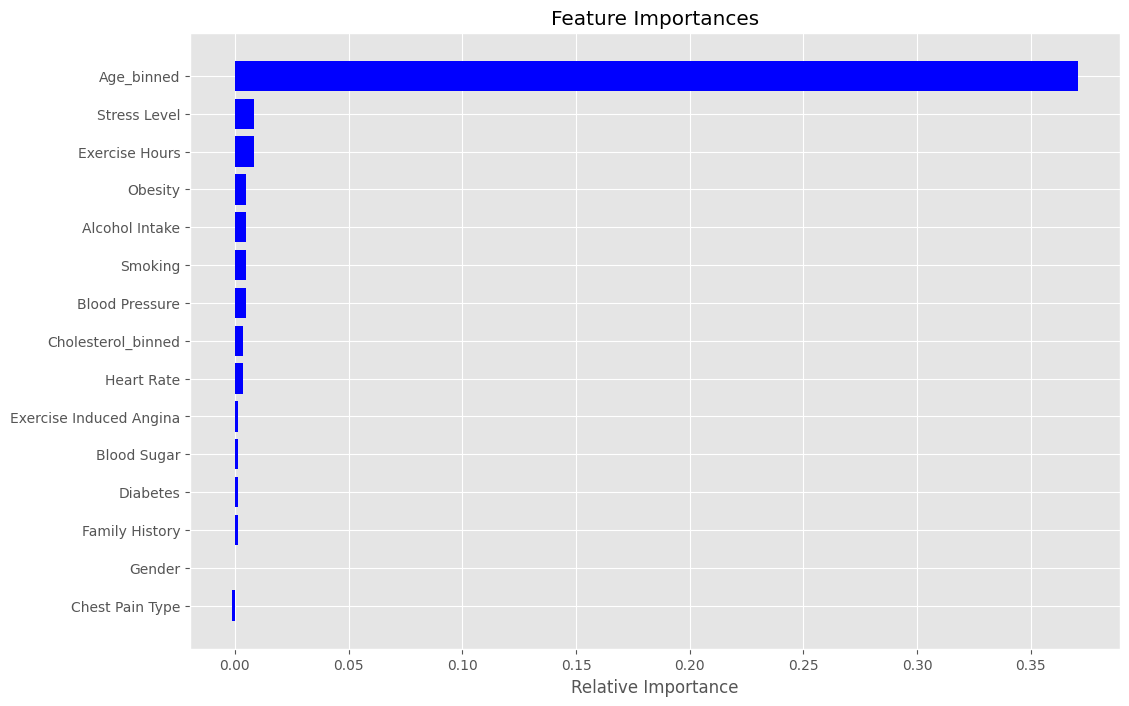

In [59]:
# Check feature importance

feature_names = df_unchanged.drop(['Heart Disease', 'Age', 'Cholesterol'], axis=1).columns
check_feature_importance(net, X_train, y_train, X_test, y_test, feature_names)

Test Loss: 0.3725, Test Accuracy: 82.00%, Precision: 0.69, Recall: 0.93, F1: 0.79, AUC: 0.88


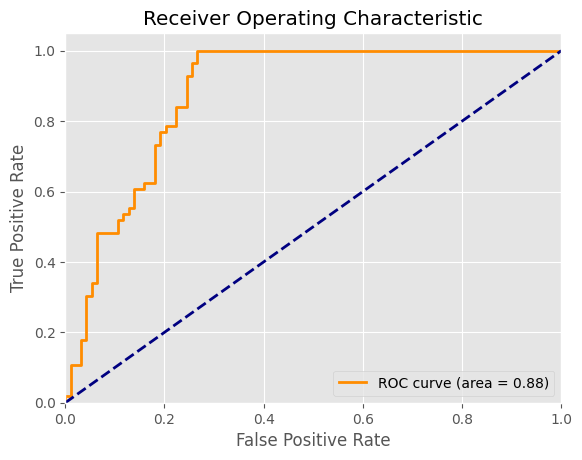

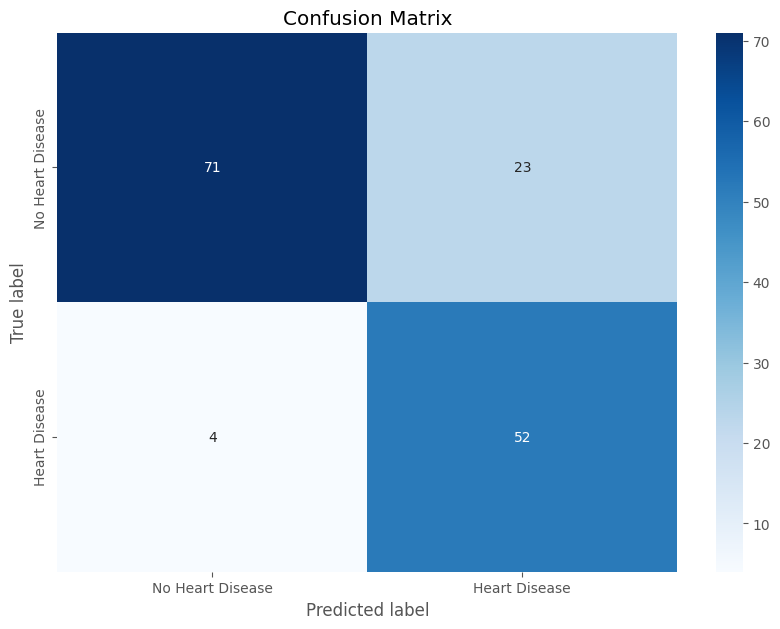

In [61]:
 #Applying more evaluation metrics

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc


def evaluate(net, test_loader, criterion):
    net.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_outputs = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = net(inputs)
            loss = custom_loss(outputs, labels, net, penalty_weight)
            test_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_outputs.extend(outputs.cpu().numpy())
    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total

    # Calculate additional metrics
    precision = precision_score(all_labels, (np.array(all_outputs) > 0.5).astype(float))
    recall = recall_score(all_labels, (np.array(all_outputs) > 0.5).astype(float))
    f1 = f1_score(all_labels, (np.array(all_outputs) > 0.5).astype(float))
    auc_score = roc_auc_score(all_labels, all_outputs)

    # Print metrics
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}, AUC: {auc_score:.2f}')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(all_labels, all_outputs)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Confusion matrix
    cm = confusion_matrix(all_labels, (np.array(all_outputs) > 0.5).astype(float))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

    return test_loss, test_accuracy, precision, recall, f1, auc_score

# Evaluate on the test set
test_loss, test_accuracy, precision, recall, f1, auc_score = evaluate(net, test_loader, criterion)

Conclusion
After many trial and errors we finally optimized the training by setting penalty_weight = 0.96. We reached over 85% Val Accuracy and a got a reasonable distribution of feature importance. You can play around with this number to see how it impacts training and feature importances. Now we'll go ahead and save the model for future use.

In [62]:
# Save the model state dict (Optional)
torch.save(net.state_dict(), 'heart_disease_classifier_pytorch.pth')